In [231]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

from sklearn import model_selection
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import learning_curve

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

from sklearn.metrics import confusion_matrix
from sklearn import metrics

#### Information on data:
- Booking data for 2 hotels 
- Both hotels are located in Portugal: H1 at the resort region of Algarve and H2 at the city of Lisbon
- Source: https://www.sciencedirect.com/science/article/pii/S2352340918315191

#### Model: 
- Bookings cancellation prediction: development of prediction models to classify a hotel booking׳s likelihood to be canceled. 
- Or do a cancelation ratio per day & probability of it to occur (??)

### Read clean data from csv

In [2]:
data = pd.read_csv('../data/Hotels.csv')

In [3]:
pd.set_option('display.max_columns', None)

In [4]:
data.head()

,IsCanceled,LeadTime,ArrivalDateYear,ArrivalDateMonth,ArrivalDateWeekNumber,ArrivalDateDayOfMonth,StaysInWeekendNights,StaysInWeekNights,Adults,Children,Babies,Meal,Country,MarketSegment,DistributionChannel,IsRepeatedGuest,PreviousCancellations,PreviousBookingsNotCanceled,ReservedRoomType,AssignedRoomType,BookingChanges,DepositType,Agent,Company,DaysInWaitingList,CustomerType,ADR,RequiredCarParkingSpaces,TotalOfSpecialRequests,ReservationStatus,ReservationStatusDate,Hotel,Arrival_Date_MonthN,ArrivalDateFull,TotalNights
0,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,Not applicable,Not applicable,0,Transient,75.0,0,0,Check-Out,2015-07-02,H1,7,2015-07-01,1
1,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304,Not applicable,0,Transient,75.0,0,0,Check-Out,2015-07-02,H1,7,2015-07-01,1
2,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240,Not applicable,0,Transient,98.0,0,1,Check-Out,2015-07-03,H1,7,2015-07-01,2
3,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240,Not applicable,0,Transient,98.0,0,1,Check-Out,2015-07-03,H1,7,2015-07-01,2
4,0,0,2015,July,27,1,0,2,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,0,No Deposit,Not applicable,Not applicable,0,Transient,107.0,0,0,Check-Out,2015-07-03,H1,7,2015-07-01,2


### Feature engineering

In [87]:
data_drop = data.sample(10000)

Drop irrelevant columns

In [88]:
data_drop.drop(['TotalNights', 'ArrivalDateFull', 'Arrival_Date_MonthN', 'ReservationStatusDate', 
                'TotalOfSpecialRequests', 'AssignedRoomType', 'Meal', 'ReservationStatus'], axis=1, inplace=True)

In [89]:
print(data_drop.shape)
data_drop.head()

(10000, 27)


,IsCanceled,LeadTime,ArrivalDateYear,ArrivalDateMonth,ArrivalDateWeekNumber,ArrivalDateDayOfMonth,StaysInWeekendNights,StaysInWeekNights,Adults,Children,Babies,Country,MarketSegment,DistributionChannel,IsRepeatedGuest,PreviousCancellations,PreviousBookingsNotCanceled,ReservedRoomType,BookingChanges,DepositType,Agent,Company,DaysInWaitingList,CustomerType,ADR,RequiredCarParkingSpaces,Hotel
33541,0,7,2017,March,9,2,1,3,2,0.0,0,NLD,Groups,Corporate,0,0,0,A,4,No Deposit,Not applicable,223,0,Transient-Party,37.0,0,H1
17348,0,221,2015,October,41,10,1,1,1,0.0,0,FRA,Offline TA/TO,TA/TO,0,0,0,A,0,No Deposit,208,Not applicable,0,Transient-Party,64.0,0,H1
25561,0,4,2016,July,29,11,1,0,2,0.0,0,PRT,Corporate,Direct,0,0,0,A,0,No Deposit,Not applicable,415,0,Transient,73.0,0,H1
112385,0,115,2017,June,22,2,0,2,2,0.0,0,PRT,Offline TA/TO,TA/TO,0,0,0,A,1,No Deposit,28,Not applicable,0,Contract,80.0,0,H2
87219,0,44,2016,April,17,23,2,1,2,0.0,0,FRA,Offline TA/TO,TA/TO,0,0,0,A,0,No Deposit,24,Not applicable,0,Transient-Party,95.0,0,H2


#### Reduce Agent, Country and Company columns

In [90]:
data_drop.Agent = [agent.strip() for agent in data_drop.Agent]

In [91]:
top = list(data_drop.Agent.value_counts().head(10).index)
top = [x for x in top if x != 'Not applicable']
top

['9', '240', '1', '14', '7', '6', '250', '241', '28']

In [92]:
for agent in data_drop.Agent:
    if agent == 'Not applicable':
        continue
    if agent not in top:
        data_drop.Agent = data_drop.Agent.replace(agent, 'Other')
    else:
        continue

In [93]:
data_drop.Agent.value_counts()

Other             2825
9                 2679
Not applicable    1317
240               1178
1                  624
14                 301
7                  282
6                  270
250                251
241                147
28                 126
Name: Agent, dtype: int64

#### Country

In [94]:
top_c = data_drop.Country.value_counts().head(10)

In [95]:
for country in data_drop.Country:
    if country not in top_c:
        data_drop.Country = data_drop.Country.replace(country, 'OTHER')

In [96]:
data_drop.Country.value_counts()

PRT      4000
OTHER    1614
GBR      1011
FRA       872
ESP       728
DEU       618
ITA       301
IRL       284
BRA       199
BEL       192
NLD       181
Name: Country, dtype: int64

#### Company

In [97]:
top_comp = list(data_drop.Company.value_counts().head(10))
top_comp = [x for x in top_comp if x != 'Not applicable']

In [98]:
top_comp

[9458, 70, 64, 21, 20, 16, 15, 13, 13, 11]

In [99]:
for company in data_drop.Company:
    if company == 'Not applicable':
        continue
    if company not in top_comp:
         data_drop.Company = data_drop.Company.replace(company, 'Other')
    else:
        continue

In [100]:
data_drop.Company.value_counts()

Other    10000
Name: Company, dtype: int64

### One Hot Encoding

In [101]:
data_drop.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 33541 to 111114
Data columns (total 27 columns):
IsCanceled                     10000 non-null int64
LeadTime                       10000 non-null int64
ArrivalDateYear                10000 non-null int64
ArrivalDateMonth               10000 non-null object
ArrivalDateWeekNumber          10000 non-null int64
ArrivalDateDayOfMonth          10000 non-null int64
StaysInWeekendNights           10000 non-null int64
StaysInWeekNights              10000 non-null int64
Adults                         10000 non-null int64
Children                       10000 non-null float64
Babies                         10000 non-null int64
Country                        10000 non-null object
MarketSegment                  10000 non-null object
DistributionChannel            10000 non-null object
IsRepeatedGuest                10000 non-null int64
PreviousCancellations          10000 non-null int64
PreviousBookingsNotCanceled    10000 non-null in

In [102]:
data_dummies = pd.get_dummies(data=data_drop, columns=['ArrivalDateMonth', 'Country', 'MarketSegment', 
                                                       'DistributionChannel', 'ReservedRoomType', 'DepositType', 
                                                       'Agent', 'Company', 'CustomerType', 
                                                       'Hotel'])

In [103]:
print(data_dummies.shape)
data_dummies.head()

(10000, 80)


,IsCanceled,LeadTime,ArrivalDateYear,ArrivalDateWeekNumber,ArrivalDateDayOfMonth,StaysInWeekendNights,StaysInWeekNights,Adults,Children,Babies,IsRepeatedGuest,PreviousCancellations,PreviousBookingsNotCanceled,BookingChanges,DaysInWaitingList,ADR,RequiredCarParkingSpaces,ArrivalDateMonth_April,ArrivalDateMonth_August,ArrivalDateMonth_December,ArrivalDateMonth_February,ArrivalDateMonth_January,ArrivalDateMonth_July,ArrivalDateMonth_June,ArrivalDateMonth_March,ArrivalDateMonth_May,ArrivalDateMonth_November,ArrivalDateMonth_October,ArrivalDateMonth_September,Country_BEL,Country_BRA,Country_DEU,Country_ESP,Country_FRA,Country_GBR,Country_IRL,Country_ITA,Country_NLD,Country_OTHER,Country_PRT,MarketSegment_Aviation,MarketSegment_Complementary,MarketSegment_Corporate,MarketSegment_Direct,MarketSegment_Groups,MarketSegment_Offline TA/TO,MarketSegment_Online TA,DistributionChannel_Corporate,DistributionChannel_Direct,DistributionChannel_GDS,DistributionChannel_TA/TO,ReservedRoomType_A,ReservedRoomType_B,ReservedRoomType_C,ReservedRoomType_D,ReservedRoomType_E,ReservedRoomType_F,ReservedRoomType_G,ReservedRoomType_H,DepositType_No Deposit,DepositType_Non Refund,DepositType_Refundable,Agent_1,Agent_14,Agent_240,Agent_241,Agent_250,Agent_28,Agent_6,Agent_7,Agent_9,Agent_Not applicable,Agent_Other,Company_Other,CustomerType_Contract,CustomerType_Group,CustomerType_Transient,CustomerType_Transient-Party,Hotel_H1,Hotel_H2
33541,0,7,2017,9,2,1,3,2,0.0,0,0,0,0,4,0,37.0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,1,0
17348,0,221,2015,41,10,1,1,1,0.0,0,0,0,0,0,0,64.0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,1,0
25561,0,4,2016,29,11,1,0,2,0.0,0,0,0,0,0,0,73.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,1,0
112385,0,115,2017,22,2,0,2,2,0.0,0,0,0,0,1,0,80.0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,1
87219,0,44,2016,17,23,2,1,2,0.0,0,0,0,0,0,0,95.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,1


## Testing ML Models

In [104]:
df_ml=data_dummies.copy()

##### Proportion of canceled vs non canceled in full ml dataset:

In [105]:
df_ml['IsCanceled'].value_counts(normalize=True)

0    0.6259
1    0.3741
Name: IsCanceled, dtype: float64

##### Define X and y:

In [106]:
y = df_ml["IsCanceled"]
X_cols = [col for col in df_ml.columns if col != "IsCanceled"]
X = df_ml[X_cols]

In [107]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

### Logistic Regression with Cross Validation

Initate model:

In [208]:
log_reg = LogisticRegression()

Use cross validation:

In [209]:
all_accuracies = cross_val_score(estimator=log_reg, X=X_train, y=y_train, cv=5)

/Users/laumaustupa/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/laumaustupa/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/laumaustupa/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/laumaustupa/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/laumaustupa/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default so

In [210]:
print(all_accuracies)
print(all_accuracies.mean())

[0.79138039 0.798125   0.7975     0.77875    0.79049406]


### Model selection loop (Logistic Regr, Decision Tree, SVM, Random Forest):

In [273]:
models = [('LogReg', LogisticRegression()), 
          ('DecTree', DecisionTreeClassifier()), 
          ('SVM', SVC()),
          ('RandFor', RandomForestClassifier())]

scoring = {'accuracy': 'accuracy',
           'precision': 'precision',
           'recall': 'recall',
          'f1': 'f1',
          'auc': 'roc_auc'}

results = []

for name, model in models:
    kfold = model_selection.KFold(n_splits=10, random_state=48)
    cv_results = model_selection.cross_validate(model, X=X_train, y=y_train, cv=kfold, 
                                                scoring=scoring, return_train_score=False)
    results.append([name, cv_results['test_accuracy'].mean(), 
                    cv_results['test_precision'].mean(), 
                    cv_results['test_recall'].mean(),
                   cv_results['test_f1'].mean(),
                   cv_results['test_auc'].mean()])

/Users/laumaustupa/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/laumaustupa/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/laumaustupa/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/laumaustupa/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/laumaustupa/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default so

In [274]:
headers = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1', 'AUC']
pd.DataFrame(data=results, columns=headers)

,Model,Accuracy,Precision,Recall,F1,AUC
0,LogReg,0.792500,0.790775,0.605410,0.685279,0.883454
1,DecTree,0.790625,0.716459,0.726578,0.721318,0.778355
2,SVM,0.724750,0.715382,0.438698,0.543420,0.757999
3,RandFor,0.822750,0.812911,0.683283,0.742053,0.896459


### Fine tune hyper-parameters on best model:  Random Forest Classifier

Initate model:

In [275]:
rand_for = RandomForestClassifier()

Define parameter list:

In [276]:
param_grid = {'max_depth': [10, 20, 30, 40, 50, None],
              'n_estimators': [10, 20, 40, 60],
             'class_weight': [{0: 0.63, 1: 0.37}, 'balanced']}

# n_estimators = number of trees in random forest
# max_depth = maximum number of levels in tree
# class_weight = Weights associated with classes in the form {class_label: weight}

Pass the initated model, hyper-parameter dictionary and cross validation to the GridSearchCV:

In [277]:
grid = GridSearchCV(rand_for, param_grid, cv=5)

Fit this grid to the train dataset:

In [278]:
grid.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'max_depth': [10, 20, 30, 40, 50, None], 'n_estimators': [10, 20, 40, 60], 'class_weight': [{0: 0.63, 1: 0.37}, 'balanced']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

Print score for best performing hyper-parameters & best hyper-parameters:

In [279]:
print(grid.best_score_)
print(grid.best_params_)

0.835375
{'class_weight': {0: 0.63, 1: 0.37}, 'max_depth': 40, 'n_estimators': 40}


Save this best scoring estimator as a model:

In [280]:
model=grid.best_estimator_

Test this model to test dataset (final evaluation):

In [281]:
model.score(X_test, y_test)

0.815

Use confusion matrix to visualise results:

In [282]:
pred = model.predict(X_test)
confusion_matrix(y_test, pred)

array([[1111,  142],
       [ 228,  519]])

In [283]:
N, train_score, val_score = learning_curve(rand_for, X_train, y_train, train_sizes=np.linspace(0.1, 1.0, 100), cv=5)
print(N)

/Users/laumaustupa/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/laumaustupa/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/laumaustupa/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/laumaustupa/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/laumaustupa/a

/Users/laumaustupa/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/laumaustupa/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/laumaustupa/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/laumaustupa/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/laumaustupa/a

/Users/laumaustupa/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/laumaustupa/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/laumaustupa/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/laumaustupa/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/laumaustupa/a

/Users/laumaustupa/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/laumaustupa/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/laumaustupa/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/laumaustupa/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/laumaustupa/a

/Users/laumaustupa/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/laumaustupa/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/laumaustupa/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/laumaustupa/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/laumaustupa/a

/Users/laumaustupa/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/laumaustupa/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/laumaustupa/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/laumaustupa/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/laumaustupa/a

/Users/laumaustupa/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/laumaustupa/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/laumaustupa/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/laumaustupa/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/laumaustupa/a

/Users/laumaustupa/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/laumaustupa/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/laumaustupa/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/laumaustupa/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/laumaustupa/a

/Users/laumaustupa/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/laumaustupa/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/laumaustupa/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/laumaustupa/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/laumaustupa/a

/Users/laumaustupa/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/laumaustupa/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/laumaustupa/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/laumaustupa/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/laumaustupa/a

/Users/laumaustupa/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/laumaustupa/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/laumaustupa/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/laumaustupa/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/laumaustupa/a

/Users/laumaustupa/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/laumaustupa/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/laumaustupa/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/laumaustupa/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/laumaustupa/a

/Users/laumaustupa/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/laumaustupa/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/laumaustupa/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/laumaustupa/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/laumaustupa/a

/Users/laumaustupa/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/laumaustupa/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/laumaustupa/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/laumaustupa/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/laumaustupa/a

/Users/laumaustupa/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/laumaustupa/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/laumaustupa/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/laumaustupa/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/laumaustupa/a

[ 639  698  756  814  872  930  988 1047 1105 1163 1221 1279 1337 1396
 1454 1512 1570 1628 1687 1745 1803 1861 1919 1977 2036 2094 2152 2210
 2268 2326 2385 2443 2501 2559 2617 2675 2734 2792 2850 2908 2966 3024
 3083 3141 3199 3257 3315 3374 3432 3490 3548 3606 3664 3723 3781 3839
 3897 3955 4013 4072 4130 4188 4246 4304 4362 4421 4479 4537 4595 4653
 4711 4770 4828 4886 4944 5002 5061 5119 5177 5235 5293 5351 5410 5468
 5526 5584 5642 5700 5759 5817 5875 5933 5991 6049 6108 6166 6224 6282
 6340 6399]


/Users/laumaustupa/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


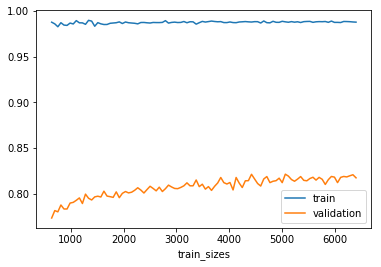

In [284]:
plt.plot(N, train_score.mean(axis=1), label='train')
plt.plot(N, val_score.mean(axis=1), label='validation')
plt.xlabel('train_sizes')
plt.legend()